# Build a Customer Support Router Agentic RAG System

In this project, we will leverage the power of AI Agents and RAG Systems to build an intelligent Router Agentic RAG System to handle customer support queries using a custom knowledgebase for a healthcare provider company.

![](https://i.imgur.com/NMz7KjG.png)

### Intelligent Router Agentic RAG System Workflow

This project focuses on building an **Intelligent Router Agentic RAG System** that combines intelligent query analysis, sentiment detection, and dynamic routing with Retrieval-Augmented Generation (RAG) to handle diverse user inquiries efficiently. The workflow includes the following components:

1. **Query Categorization and Sentiment Analysis**:
   - The system uses **OpenAI GPT-4o** to analyze the user's query and determine:
     - **Query Category**: Identifies the type of problem in terms of the best department in the organization which could answer the query, such as billing, appointments, records or insurance
     - **User Sentiment**: Evaluates the user's sentiment (positive, neutral, negative, or distress) to determine if escalation is needed to human support or on-call doctors or automated query resolution using RAG.

2. **Intelligent Routing**:
   - Based on the **query_category** and **query_sentiment**, the system routes the query to the appropriate handling node:
     - **Escalate to Human Support**: If the sentiment is negative, the query is escalated to a human support agent for resolution after the user fills in a form with their details.
     - **Escalate to On-Call Team**: If the sentiment is distress, the query is escalated to the on-call team of doctors for resolution after the user fills in a form with their details.
     - **Generate Department Response**: If the sentiment is positive or neutral, queries related to specific department RAG workflows based on the query category:
       - **Billing Response**: Billing queries are routed to use only billing related documents in the vector database for a specialized response using RAG.
       - **Appointments Response**: Doctor appointment booking related queries are routed to use only appointment related documents in the vector database for a specialized response using RAG.
       - **Records Response**: Patient health records queries are routed to use only records related documents in the vector database for a specialized response using RAG.
       - **Insurance Response**: Health insurance queries are routed to use only insurance related documents in the vector database for a specialized response using RAG.

3. **Knowledge Base Integration (RAG)**:
   - The system integrates with a **Knowledge Base (Vector Database)** to augment responses with relevant and accurate information.
   - Retrieval-Augmented Generation (RAG) ensures that responses are grounded in the latest and most reliable data.

4. **Escalation Mechanism**:
   - Negative sentiment triggers an **escalation to a human support agent**; Distress sentiment triggers an **escalation to an emergency on-call team of doctors** ensuring the user receives empathetic and personalized support for critical issues.


## Install OpenAI, LangGraph and LangChain dependencies

In [1]:
!pip install langchain==0.3.20
!pip install langchain-openai==0.3.9
!pip install langchain-community==0.3.20
!pip install langgraph==0.3.18

  Using cached langchain_text_splitters-0.3.9-py3-none-any.whl.metadata (1.9 kB)
  Using cached langsmith-0.3.45-py3-none-any.whl.metadata (15 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 6.0 MB/s  0:00:00
Using cached langchain_text_splitters-0.3.9-py3-none-any.whl (33 kB)
Using cached langsmith-0.3.45-py3-none-any.whl (363 kB)

  Attempting uninstall: langsmith

    Found existing installation: langsmith 0.4.10

    Uninstalling langsmith-0.4.10:

      Successfully uninstalled langsmith-0.4.10

   ---------------------------------------- 0/3 [langsmith]
   ---------------------------------------- 0/3 [langsmith]
   ---------------------------------------- 0/3 [langsmith]
   ---------------------------------------- 0/3 [langsmith]
   ---------------------------------------- 0/3 [langsmith]
   ---------------------------------------- 0/3 [langsmith]
   ---------------------------------------- 0/3 [langs

## Install ChromaDB LangChain Wrapper for Vector DB

In [2]:
!pip install langchain-chroma==0.2.2

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached chroma_hnswlib-0.7.6-cp312-cp312-win_amd64.whl
  Using cached fastapi-0.116.1-py3-none-any.whl.metadata (28 kB)
  Using cached uvicorn-0.35.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached onnxruntime-1.22.1-cp312-cp312-win_amd64.whl.metadata (5.1 kB)
  Using cached pypika-0.48.9-py2.py3-none-any.whl
  Using cached overrides-7.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached bcrypt-4.3.0-cp39-abi3-win_amd64.whl.metadata (10 kB)
  Using cached typer-0.16.0-py3-none-any.whl.metadata (15 kB)
  Using cached kubernetes-33.1.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached pyproject_hooks-1.2.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached starlette-0.47.2-py3-none-any.whl.metadata (6.2 kB)
  Using cached google_auth-2.40.3-py2.py3-none-any.whl.metadata (6.2 kB)
  Using cached websocket_client-1.8.0-py3-none-any.w

## Install Jupyter Widgets for Building Form UI elements

In [3]:
!pip install ipywidgets
!pip install jupyter-ui-poll==1.0.0

   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 24.8 MB/s  0:00:00

   ---------------------------------------- 0/3 [widgetsnbextension]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywid

## Enter Open AI API Key

In [ ]:
# from getpass import getpass

# OPENAI_KEY = getpass('Enter Open AI API Key: ')

Enter Open AI API Key: ··········


## Setup Environment Variables

In [ ]:
# import os

# os.environ['OPENAI_API_KEY'] = OPENAI_KEY

In [ ]:
from dotenv import load_env
load_env()

## Load Healthcare Company Knowledge Base

In [4]:
# or download manually from https://drive.google.com/file/d/1_bQj7VkXDMwwqJmspFgRzH2mgK1CVMUY/view?usp=sharing and upload to colab or your notebook location
!gdown 1_bQj7VkXDMwwqJmspFgRzH2mgK1CVMUY

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
import json

with open("./healthcare_db.json", "r") as f:
    knowledge_base = json.load(f)

knowledge_base[:3]

[{'text': "Question: How can I view my healthcare billing statement online? Answer: You can view your billing statement by logging into your patient portal and selecting 'Billing Statements'.",
  'metadata': {'category': 'billing'}},
 {'text': 'Question: What payment methods are accepted for medical bills? Answer: We accept credit cards, bank transfers, and insurance payments for settling your medical bills.',
  'metadata': {'category': 'billing'}},
 {'text': 'Question: Can I get a detailed invoice for my medical services? Answer: Yes, a detailed invoice is available in your patient portal under the billing section.',
  'metadata': {'category': 'billing'}}]

In [6]:
knowledge_base[-3:]

[{'text': 'Question: What should I do if my insurance claim is denied? Answer: If a claim is denied, please contact our insurance support department to review the issue and resubmit your claim if needed.',
  'metadata': {'category': 'insurance'}},
 {'text': 'Question: How are changes in insurance policies communicated to patients? Answer: Any changes are updated in your patient portal and communicated through email notifications.',
  'metadata': {'category': 'insurance'}},
 {'text': 'Question: Is my insurance information kept confidential? Answer: Yes, all insurance information is handled in strict compliance with HIPAA regulations to ensure your privacy.',
  'metadata': {'category': 'insurance'}}]

In [7]:
from langchain.docstore.document import Document
from tqdm import tqdm

processed_docs = []

for doc in tqdm(knowledge_base):
    metadata = doc['metadata']
    data = doc['text']
    processed_docs.append(Document(page_content=data,
                                   metadata=metadata))

processed_docs[:3]

100%|██████████| 40/40 [00:00<00:00, 39784.72it/s]


[Document(metadata={'category': 'billing'}, page_content="Question: How can I view my healthcare billing statement online? Answer: You can view your billing statement by logging into your patient portal and selecting 'Billing Statements'."),
 Document(metadata={'category': 'billing'}, page_content='Question: What payment methods are accepted for medical bills? Answer: We accept credit cards, bank transfers, and insurance payments for settling your medical bills.'),
 Document(metadata={'category': 'billing'}, page_content='Question: Can I get a detailed invoice for my medical services? Answer: Yes, a detailed invoice is available in your patient portal under the billing section.')]

## Create Vector Database

In [8]:
from langchain_openai import OpenAIEmbeddings

# details here: https://openai.com/blog/new-embedding-models-and-api-updates
openai_embed_model = OpenAIEmbeddings(model='text-embedding-3-small')

In [9]:
from langchain_chroma import Chroma

kbase_db = Chroma.from_documents(documents=processed_docs,
                                  collection_name='knowledge_base',
                                  embedding=openai_embed_model,
                                  # need to set the distance function to cosine else it uses euclidean by default
                                  # check https://docs.trychroma.com/guides#changing-the-distance-function
                                  collection_metadata={"hnsw:space": "cosine"},
                                  persist_directory="./knowledge_base")

Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


## Create Vector Database Retriever Strategy

In [10]:
kbase_search = kbase_db.as_retriever(search_type="similarity_score_threshold",
                                     search_kwargs={"k": 3, "score_threshold": 0.3})

In [11]:
query = 'what payment methods do you accept?'
metadata_filter = {'category' : 'billing'}
# Update retriever search_kwargs dynamically
kbase_search.search_kwargs["filter"] = metadata_filter
kbase_search.invoke(query)

Failed to send telemetry event CollectionQueryEvent: capture() takes 1 positional argument but 3 were given


[Document(id='517ecccc-c075-4674-a18d-481c690a47f0', metadata={'category': 'billing'}, page_content='Question: What payment methods are accepted for medical bills? Answer: We accept credit cards, bank transfers, and insurance payments for settling your medical bills.'),
 Document(id='2e5b1ae9-280c-4ce7-8f38-44d034ab8114', metadata={'category': 'billing'}, page_content='Question: Is there a discount for upfront payment of my medical bill? Answer: Some facilities offer discounts for upfront payments; please contact our billing department for details.'),
 Document(id='80bed481-8e69-4b7e-b7e0-fd58ea0e901e', metadata={'category': 'billing'}, page_content='Question: Can I receive a consolidated bill for multiple healthcare services? Answer: Yes, we offer consolidated billing for patients receiving multiple services. Contact billing support for more details.')]

In [12]:
query = 'what payment methods do you accept?'
metadata_filter = {'category' : 'Billing'}
# Update retriever search_kwargs dynamically
kbase_search.search_kwargs["filter"] = metadata_filter
kbase_search.invoke(query)

No relevant docs were retrieved using the relevance score threshold 0.3


[]

In [13]:
query = 'what payment methods do you accept?'
metadata_filter = {'category' : 'appointments'}
# Update retriever search_kwargs dynamically
kbase_search.search_kwargs["filter"] = metadata_filter
kbase_search.invoke(query)

No relevant docs were retrieved using the relevance score threshold 0.3


[]

In [14]:
query = 'how to book an appointment?'
metadata_filter = {'category' : 'appointments'}
# Update retriever search_kwargs dynamically
kbase_search.search_kwargs["filter"] = metadata_filter
kbase_search.invoke(query)

[Document(id='ade0b944-86b1-42a2-b681-2571a23af378', metadata={'category': 'appointments'}, page_content="Question: How do I book a telehealth consultation? Answer: Telehealth appointments can be scheduled by selecting the 'Virtual Visit' option when booking your appointment online."),
 Document(id='1113e799-0f94-4888-98b9-c81dec806276', metadata={'category': 'appointments'}, page_content='Question: How do I schedule a medical appointment online? Answer: You can schedule an appointment through our patient portal by selecting your preferred date and healthcare provider.'),
 Document(id='55c0ed8c-9c31-41cc-a3ee-396b2cc37bc7', metadata={'category': 'appointments'}, page_content='Question: Can I request a specific time slot for my appointment? Answer: Yes, you may request a specific time when booking, subject to availability.')]

Get an idea of the unique categories of documents we have

In [15]:
# Retrieve all metadata from the collection
results = kbase_db._collection.get(              # No filtering, fetches all documents
    include=["metadatas"]    # Include metadata in the result
)

# Extract the unique 'category' values from the metadata
unique_categories = set()
for metadata in results["metadatas"]:
    if "category" in metadata:
        unique_categories.add(metadata["category"])

print(unique_categories)

Failed to send telemetry event CollectionGetEvent: capture() takes 1 positional argument but 3 were given


{'billing', 'appointments', 'insurance', 'medical_records'}


# Build the Router Agentic RAG System

![](https://i.imgur.com/jkQZ17g.png)

![](https://i.imgur.com/OKLpCFE.png)

## Define the Agent State Schema

Here we define the key state schema that maintains the agent's state across different steps of execution in the LangGraph workflow.

We define a `CustomerSupportAgentState` typed dictionary to track relevant information for each customer interaction:
- **customer_query**: The text of the customer's question.
- **query_category**: Categorized as one of `Billing`, `Appointments`, `Records`, or `Insurance`, based on the nature of the query.
- **query_sentiment**: The inferred sentiment of the query, which can be `Positive`, `Neutral`, `Negative`, or `Distress`, used to guide escalation or empathetic handling.
- **escalation_cust_info**: A dictionary containing customer information needed in case the query requires escalation to a human support agent.
- **oncall_cust_info**: A dictionary with on-call agent or customer-specific contact details for real-time support handling.
- **final_response**: The final system-generated response sent back to the customer.

We also define two Pydantic models to enforce valid values for key variables:
- `QueryCategory`: Ensures the query category is one of the expected types.
- `QuerySentiment`: Ensures the sentiment label is one of the predefined options used for prioritization and routing.


In [16]:
from typing import TypedDict, Literal
from pydantic import BaseModel

class CustomerSupportAgentState(TypedDict):
    customer_query: str
    query_category: str
    query_sentiment: str
    escalation_cust_info: dict
    oncall_cust_info: dict
    final_response: str

class QueryCategory(BaseModel):
    categorized_topic: Literal['Billing', 'Appointments', 'Records', 'Insurance']

class QuerySentiment(BaseModel):
    sentiment: Literal['Positive', 'Neutral', 'Negative', 'Distress']

## Plan the Agent Workflow Structure

This is the Agent workflow we will be using

![](https://i.imgur.com/1I4VJid.png)

Next up we will define python functions for each of the nodes in this Agent graph

## Create Node Functions

Each function below represents a stage in processing a customer inquiry in the Intelligent Router Agentic RAG System:

1. **categorize_inquiry**: Uses an LLM to classify the user's query into a department such as billing, appointments, records, or insurance.
2. **analyze_inquiry_sentiment**: Evaluates the sentiment of the user’s query (positive, neutral, negative, or distress) to determine the appropriate handling route.
3. **accept_user_input_escalation**: Collects additional input from the user when a negative sentiment is detected to facilitate escalation to a human support agent.
4. **escalate_to_human_agent**: Escalates the query and submitted form details to a human agent for personalized resolution.
5. **accept_user_input_oncall**: Collects additional input from the user when a distress sentiment is detected for emergency handling.
6. **escalate_to_oncall_team**: Escalates the query and form details to the on-call medical team for urgent resolution.
7. **generate_department_response**: Routes the query to the appropriate department-specific RAG workflow and generates a response using relevant context documents.


### Connect to LLM for our Agent

In [17]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o", temperature=0)

### Create the categorize_inquiry function

Uses an LLM to classify the user's query into a department such as billing, appointments, records, or insurance.

In [19]:
def categorize_inquiry(support_state: CustomerSupportAgentState) -> CustomerSupportAgentState:
    """
    Classify the customer query into 'Billing', 'Appointments', 'Records' or 'Insurance'.
    """

    query = support_state["customer_query"]
    ROUTE_CATEGORY_PROMPT = """Act as a customer support agent trying to best categorize the customer query.
                               You are a support agent for a healthcare company focusing on providing healthcare services to customers.
                               These services include:
                                - handling billing queries
                                - handling insurance queries
                                - handling appointment booking queries
                                - handling medical records queries

                               Please read the customer query below and
                               determine the best category from the following list:

                               'Billing', 'Appointments', 'Records' or 'Insurance'

                               Remember:
                                - Billing queries will focus more on payment and billing related aspects
                                - Appointments will focus more on booking, rescheduling, cancelling doctor appointments
                                - Records will focus more on updating, sharing, accessing medical records
                                - Insurance will focus more on insurance related queries like claims, updating insurance policy details

                                Return just the category name (from one of the above)

                                Query:
                                {customer_query}
                            """
    prompt = ROUTE_CATEGORY_PROMPT.format(customer_query=query)
    route_category = llm.with_structured_output(QueryCategory).invoke(prompt)

    return {
        "query_category": route_category.categorized_topic
    }

In [20]:
categorize_inquiry({"customer_query": "What doctors are available?"})

{'query_category': 'Appointments'}

In [21]:
categorize_inquiry({"customer_query": "what payment modes do you accept?"})

{'query_category': 'Billing'}

In [22]:
categorize_inquiry({"customer_query": "how to access my medical information?"})

{'query_category': 'Records'}

In [23]:
categorize_inquiry({"customer_query": "how to update my policy?"})

{'query_category': 'Insurance'}

### Create the analyze_inquiry_sentiment function

Evaluates the sentiment of the user’s query (positive, neutral, negative, or distress) to determine the appropriate handling route.

In [24]:
def analyze_inquiry_sentiment(support_state: CustomerSupportAgentState) -> CustomerSupportAgentState:
    """
    Analyze the sentiment of the customer query as Positive, Neutral, Negative or Distress.
    """

    query = support_state["customer_query"]
    SENTIMENT_CATEGORY_PROMPT = """Act as a customer support agent trying to best categorize the customer query.
                                   You are a support agent for a healthcare company focusing on providing healthcare services to customers.
                                   These services include:
                                    - handling billing queries
                                    - handling insurance queries
                                    - handling appointment booking queries
                                    - handling medical records queries

                                   Please read the customer query below,
                                   analyze its sentiment which should be one from the following list:

                                   'Positive', 'Neutral', 'Negative' or 'Distress'.

                                   Remember these rules when finding the sentiment:
                                     - 'Distress' happens only when the customer is facing a health emergency and might need the on-call emergency doctor
                                     - 'Negative' happens only when the customer is not happy with certain products, services offered by the company

                                   Return just the sentiment (from one of the above)

                                   Query:
                                   {customer_query}
                                """
    prompt = SENTIMENT_CATEGORY_PROMPT.format(customer_query=query)
    sentiment_category = llm.with_structured_output(QuerySentiment).invoke(prompt)

    return {
        "query_sentiment": sentiment_category.sentiment
    }

In [25]:
analyze_inquiry_sentiment({"customer_query": "how are my medical records protected?"})

{'query_sentiment': 'Neutral'}

In [26]:
analyze_inquiry_sentiment({"customer_query": "I am fed up with not able to book appointments in the portal"})

{'query_sentiment': 'Negative'}

In [27]:
analyze_inquiry_sentiment({"customer_query": "I am not able to breathe properly, please help me"})

{'query_sentiment': 'Distress'}

### Create the generate_department_response function

Gets the user query and query department category from the agent state.

Uses Vector DB metadata filtering and retrieval to retrieve top-K documents which are cosine similar to the user query

![](https://i.imgur.com/7DA9H7I.png)

Uses standard RAG by passing these documents and query to an LLM to generate a contextual response and update the `final_response` key in the agent state.

__Note:__ You can maintain separate Vector DBs for each category also and route to the right Vector DB based on the query category

In [28]:
from langchain_core.prompts import ChatPromptTemplate
from typing import Dict

def generate_department_response(support_state: CustomerSupportAgentState) -> CustomerSupportAgentState:
    """
    Provide a department support response by combining knowledge from the vector store and LLM.
    """
    # Retrieve category and ensure it is lowercase for metadata filtering
    categorized_topic = support_state["query_category"]
    query = support_state["customer_query"]

    # Use metadata filter for department - specific queries
    if categorized_topic.lower() == "billing":
        metadata_filter = {"category": "billing"}
        department = "Billing"
    elif categorized_topic.lower() == "appointments":
        metadata_filter = {"category": "appointments"}
        department = "Appointments"
    elif categorized_topic.lower() == "records":
        metadata_filter = {"category": "medical_records"}
        department = "Medical Records"
    elif categorized_topic.lower() == "insurance":
        metadata_filter = {"category": "insurance"}
        department = "Insurance"
    # apply metadata filter
    kbase_search.search_kwargs["filter"] = metadata_filter

    # Perform retrieval from VectorDB
    relevant_docs = kbase_search.invoke(query)
    retrieved_content = "\n\n".join(doc.page_content for doc in relevant_docs)

    # Combine retrieved information into the prompt
    prompt = ChatPromptTemplate.from_template(
        """
        Craft a clear and detailed support response for the following customer query about {department}.
        Use the provided knowledge base information to enrich your response.
        In case there is no knowledge base information or you do not know the answer just say:

        Apologies I was not able to answer your question, please reach out to +1-xxx-xxxx

        Customer Query:
        {customer_query}

        Relevant Knowledge Base Information:
        {retrieved_content}
        """
    )

    # Generate the final response using the LLM
    chain = prompt | llm
    reply = chain.invoke({
        "customer_query": query,
        "retrieved_content": retrieved_content,
        "department": department
    }).content

    # Update and return the modified support state
    return {
        "final_response": reply
    }

In [29]:
generate_department_response({"customer_query": "what payment modes do you accept?", "query_category": "Billing"})

{'final_response': 'Thank you for reaching out with your query about payment modes. We accept the following payment methods for settling your medical bills: credit cards, bank transfers, and insurance payments. If you have any further questions or need assistance with your billing, please feel free to contact us.'}

In [30]:
generate_department_response({"customer_query": "how to book an appointment?", "query_category": "Appointments"})

{'final_response': "To book an appointment, you have a couple of options depending on your needs:\n\n1. **Telehealth Consultation**: If you are looking to book a telehealth appointment, you can do so by selecting the 'Virtual Visit' option when booking your appointment online.\n\n2. **Medical Appointment**: For scheduling a medical appointment online, you can use our patient portal. Simply log in, select your preferred date and healthcare provider, and follow the prompts to complete your booking.\n\nAdditionally, you can request a specific time slot for your appointment, although this is subject to availability.\n\nIf you need further assistance, please feel free to reach out to us."}

In [31]:
generate_department_response({"customer_query": "what doctors are available?", "query_category": "Appointments"})

{'final_response': 'Thank you for reaching out with your query about doctor availability. We have a range of specialists available for appointments five days a week. Here is a list of doctors you can schedule appointments with:\n\n- **Dr. Smith** - Specializes in Cardiology\n- **Dr. Johnson** - Specializes in Dermatology\n- **Dr. Lee** - Specializes in Pediatrics\n- **Dr. Patel** - Specializes in Orthopedics\n- **Dr. Garcia** - Specializes in Neurology\n\nTo find out more about their specific availability or to schedule an appointment, please visit the appointment section in your portal. You can filter the available doctors by their specialty and location to find the best match for your needs.\n\nIf you require a same-day appointment, we often have availability. For urgent scheduling needs, please contact our scheduling department directly.\n\nIf you have any further questions or need assistance, feel free to reach out.'}

In [32]:
generate_department_response({"customer_query": "are my doctor records safe?", "query_category": "Records"})

{'final_response': 'Thank you for reaching out with your concern about the safety of your medical records. I want to assure you that we take the security of your personal health information very seriously. Our system complies with HIPAA regulations, which are designed to ensure that your medical records are securely stored and transmitted. This means that we have implemented strict measures to protect your information from unauthorized access.\n\nAdditionally, when your medical records need to be shared with other healthcare providers, we do so securely and only with authorized providers, in full compliance with HIPAA guidelines. This ensures that your information is handled with the utmost care and confidentiality.\n\nIf you have any further questions or need additional information, please feel free to reach out. Your privacy and the security of your medical records are our top priorities.'}

In [33]:
generate_department_response({"customer_query": "how to update my insurance policy?", "query_category": "Insurance"})

{'final_response': 'To update your insurance policy, you can do so through the insurance settings in your patient portal. Simply log in to your account, navigate to the insurance section, and make the necessary updates to your policy information. If there are any changes to your insurance policy, these will be reflected in your patient portal and you will also receive email notifications to keep you informed. If you need further assistance, please feel free to reach out to our support team.'}

### Create the accept_user_input_escalation function

![](https://i.imgur.com/nwTR2ce.png)

Collects additional input from the user when a negative sentiment is detected to facilitate escalation to a human support agent.

This function opens up a simple form using Jupyter widgets as a User Interface (UI), accepts information from the user in the UI and saves it in the agent state to be used later. Example shown below here:

![](https://i.imgur.com/feZqjwj.png)

__Note:__ You are free to implement your own UI based workflows to accept user input when you build or integrate such a system in your existing applications \ organization

In [34]:
import ipywidgets as widgets
from IPython.display import display
from jupyter_ui_poll import ui_events
import time

def accept_user_input_escalation(support_state: CustomerSupportAgentState) -> CustomerSupportAgentState:

    # REMEMBER: You can always customize the way you accept user input by modifying the code below
    # here we use jupyter widgets so you don't have to install too many external dependencies

    global form_submitted  # status variable to track form submission
    form_submitted = False # initially form hasn't been submitted

    # UI Header: A simple HTML element to label the form
    header = widgets.HTML("<h3>Escalation Form - Please enter your details below:</h3>")

    # Text input fields to collect user information
    input1 = widgets.Text(description='Name:')     # User's full name
    input2 = widgets.Text(description='Number:')   # Contact number
    input3 = widgets.Text(description='Email:')    # Email address

    # Dictionary to store form responses after submission
    result = {}

    # Callback function to be triggered when the Submit button is clicked
    def on_submit(submit_button):
        global form_submitted
        form_submitted = True  # Mark the form as submitted
        # Store user inputs into the result dictionary
        result['name'] = input1.value
        result['number'] = input2.value
        result['email'] = input3.value
        # Provide visual feedback that form is submitted
        submit_button.description = '👍'

    # Submit button widget setup
    submit_button = widgets.Button(description="Submit")
    submit_button.on_click(on_submit)  # Attach callback to button

    # Combine all widgets into a vertical layout box
    vbox = widgets.VBox([header, input1, input2, input3, submit_button])
    display(vbox)  # Render the form in the notebook interface

    # Keep polling UI events until the form is submitted
    with ui_events() as poll:
        while form_submitted is False:
            poll(5)               # Listen for UI events
            print('.', end='')   # Show a dot to indicate waiting for input from user
            time.sleep(0.3)      # Slight delay to reduce CPU usage

    # Return updated agent state with captured user info for escalation
    return {
        'escalation_cust_info': result
    }


In [35]:
accept_user_input_escalation({})

.............................................................................................................................................................................................................................................

KeyboardInterrupt: 

### Create the escalate_to_human_agent function

Escalates the query and submitted form details to a human agent for personalized resolution.

The agent shows a response back to the user with their form input details that they will be contacted soon.

__Note:__ You are free to implement any custom logic here to:
 - Send emails to human agent
 - Call APIs to notify support agent like Whatsapp or internal company platforms

In [ ]:
def escalate_to_human_agent(support_state: CustomerSupportAgentState) -> CustomerSupportAgentState:

    # REMEMBER: You can always customize the way you notify the human support agent by adding custom code below.
    # This could include emailing them, paging them, sending them notifications using specific platform APIs like whatsapp etc.
    # Here we have kept it very simple:
    #  we just show a response back to the user showing the details they entered in the form earlier
    #  and telling them they will be contacted by a human support agent

    # get the customer info from agent state which they entered in the form
    escalation_cust_info = support_state['escalation_cust_info']
    # the following response will be shown to the user and can also be sent (customer form inputs) to your human support agents
    response = ("Apologies, " + escalation_cust_info['name'] +
                ",  we are really sorry! Someone from our team will be reaching out to via email shortly at "+
                escalation_cust_info['email'] + " and if needed we will also be calling you at: " +
                escalation_cust_info['number'] + " to help you out!")

    # NOTE: You can always add custom code here to call specific APIs like whatsapp or email etc to notify your human support agents

    return {
        "final_response": response
    }

### Create the accept_user_input_oncall function

![](https://i.imgur.com/FrKgxox.png)

Collects additional input from the user when a distress sentiment is detected to facilitate escalation to a human doctor from the on-call emergency team.

This function opens up a simple form using Jupyter widgets as a User Interface (UI), accepts information from the user in the UI and saves it in the agent state to be used later. Example shown below here:

![](https://i.imgur.com/RvOWl3u.png)

__Note:__ You are free to implement your own UI based workflows to accept user input when you build or integrate such a system in your existing applications \ organization

In [ ]:
def accept_user_input_oncall(support_state: CustomerSupportAgentState) -> CustomerSupportAgentState:

    # REMEMBER: You can always customize the way you accept user input by modifying the code below
    # here we use jupyter widgets so you don't have to install too many external dependencies

    global form_submitted  # status variable to track form submission
    form_submitted = False # initially form hasn't been submitted

    # UI Header: Display a title for the emergency form
    header = widgets.HTML("<h3>Emergency Form - Please enter your details below:</h3>")

    # Text input fields to collect critical user info
    input1 = widgets.Text(description='Name:')     # User's full name
    input2 = widgets.Text(description='Number:')   # Contact number (required for emergency callback)

    # Dictionary to store the captured input values
    result = {}

    # Callback function executed when user clicks the Submit button
    def on_submit(submit_button):
        global form_submitted
        form_submitted = True  # Form is now submitted
        # Save form data to result dictionary
        result['name'] = input1.value
        result['number'] = input2.value
        # Visual confirmation of submission
        submit_button.description = '👍'

    # Submit button widget setup
    submit_button = widgets.Button(description="Submit")
    submit_button.on_click(on_submit)  # Attach the callback function

    # Combine widgets vertically and render in notebook
    vbox = widgets.VBox([header, input1, input2, submit_button])
    display(vbox)

    # Keep polling for UI events until form is submitted
    with ui_events() as poll:
        while form_submitted is False:
            poll(5)               # Monitor UI events
            print('.', end='')   # Show a dot to indicate waiting for input from user
            time.sleep(0.3)      # Slight delay to reduce CPU usage

    # Return updated agent state with emergency form details
    return {
        'oncall_cust_info': result
    }


In [ ]:
accept_user_input_oncall({})

..........................................................

{'oncall_cust_info': {'name': 'DJ', 'number': '1000910'}}

### Create the escalate_to_oncall_team function

Escalates the query and form details to the on-call medical team for urgent resolution.

The agent shows a response back to the user with their form input details that they will be contacted soon by a doctor from the emergency on-call team.

__Note:__ You are free to implement any custom logic here to:
 - Call APIs to notify doctors from the on-call team using Whatsapp or internal company platform tools

In [ ]:
def escalate_to_oncall_team(support_state: CustomerSupportAgentState) -> CustomerSupportAgentState:

    # REMEMBER: You can always customize the way you notify the emergency on-call medical team of doctors by adding custom code below.
    # This could include paging them, sending them notifications using specific platform APIs like whatsapp etc.
    # Here we have kept it very simple:
    #  we just show a response back to the user showing the details they entered in the form earlier
    #  and telling them they will be contacted by a doctor from the on-call team

    # get the customer info from agent state which they entered in the form
    oncall_cust_info = support_state['oncall_cust_info']
    # the following response will be shown to the user and can also be sent (customer form inputs) to your on-call doctors
    response = ("Don't worry " + oncall_cust_info['name'] +
               "!, someone from our on-call expert doctors will be reaching out to your shortly at " +
                oncall_cust_info['number'] +
                " for assistance immediately!")

    # NOTE: You can always add custom code here to call specific APIs like whatsapp to notify your on-call doctors

    return {
        "final_response": response
    }

## Build and Compile the Agent Graph Workflow

We construct a LangGraph agent workflow with the following sequence of nodes:

1. **categorize_inquiry** → Classifies the incoming user query into one of the organizational departments (e.g., billing, appointments, records, insurance).
2. **analyze_inquiry_sentiment** → Evaluates the sentiment of the query as positive, neutral, negative, or distress.

The routing then follows three possible branches:

- If **sentiment is negative**, the flow proceeds to:
  - **accept_user_input_escalation** → Collects escalation-related user details.
  - **escalate_to_human_agent** → Forwards the query and collected details to a human support agent.

- If **sentiment is distress**, the flow proceeds to:
  - **accept_user_input_oncall** → Collects emergency-related information from the user.
  - **escalate_to_oncall_team** → Escalates the issue to the on-call emergency doctor team.

- If **sentiment is positive or neutral**, the query proceeds to:
  - **generate_department_response** → Triggers a department-specific RAG workflow using the appropriate knowledge base to generate a grounded response.

The graph terminates at the **end** node once a response or escalation has been completed.


In [ ]:
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import MemorySaver

# Create a typed LangGraph state graph using the custom CustomerSupportAgentState
customer_support_graph = StateGraph(CustomerSupportAgentState)

# Register each functional node in the graph that represents a step in the agent workflow

# Step 1: Categorize the incoming query by department (e.g., billing, records, etc.)
customer_support_graph.add_node("categorize_inquiry", categorize_inquiry)
# Step 2: Analyze the user's sentiment (positive, neutral, negative, distress)
customer_support_graph.add_node("analyze_inquiry_sentiment", analyze_inquiry_sentiment)

# Step 3a: Accept user input for escalation to human support (for negative sentiment)
customer_support_graph.add_node("accept_user_input_escalation", accept_user_input_escalation)
# Step 3b: Escalate to a human support agent using the collected details
customer_support_graph.add_node("escalate_to_human_agent", escalate_to_human_agent)

# Step 4a: Accept user input for escalation to emergency on-call team (for distress sentiment)
customer_support_graph.add_node("accept_user_input_oncall", accept_user_input_oncall)
# Step 4b: Escalate to on-call emergency doctor team using submitted details
customer_support_graph.add_node("escalate_to_oncall_team", escalate_to_oncall_team)

# Step 5: Generate a department-specific response using RAG if sentiment is positive or neutral
customer_support_graph.add_node("generate_department_response", generate_department_response)

# Define the router function that directs the flow based on sentiment and category
def determine_route(support_state: CustomerSupportAgentState) -> str:

    # Determine the next node based on query sentiment and category.
    # - Escalate to human support agent if sentiment is negative i.e fill form for escalation
    # - Escalate to emergency on-call team if sentiment is distress i.e fill form for on-call doctors
    # - Otherwise, use department-specific RAG response

    if support_state["query_sentiment"] == "Negative":
        return "accept_user_input_escalation"
    elif support_state["query_sentiment"] == "Distress":
        return "accept_user_input_oncall"
    elif support_state["query_category"] in ["Billing", "Appointments", "Records", "Insurance"]:
        return "generate_department_response"

# Define the flow of transitions between the nodes in the graph

# After categorizing the query, move to sentiment analysis
customer_support_graph.add_edge("categorize_inquiry", "analyze_inquiry_sentiment")
# After sentiment analysis, use conditional routing to determine next steps
customer_support_graph.add_conditional_edges(
    "analyze_inquiry_sentiment",
    determine_route,
    [
        "accept_user_input_escalation",
        "accept_user_input_oncall",
        "generate_department_response",
    ]
)

# If the user input is collected for escalation, route to human agent
customer_support_graph.add_edge("accept_user_input_escalation", "escalate_to_human_agent")
customer_support_graph.add_edge("escalate_to_human_agent", END)

# If the user input is collected for on-call emergency, route to on-call team
customer_support_graph.add_edge("accept_user_input_oncall", "escalate_to_oncall_team")
customer_support_graph.add_edge("escalate_to_oncall_team", END)

# If sentiment is neutral or positive, generate a department response and finish
customer_support_graph.add_edge("generate_department_response", END)

# Set the starting point of the workflow
customer_support_graph.set_entry_point("categorize_inquiry")

# Compile the graph
memory = MemorySaver()
form_submitted = False # initially no form has been submitted
compiled_support_agent = customer_support_graph.compile(checkpointer=memory)

## Visualize the Agentic Router RAG Architecture Workflow

Below is a generated diagram of the workflow using Mermaid syntax. It shows how each node connects in the graph.

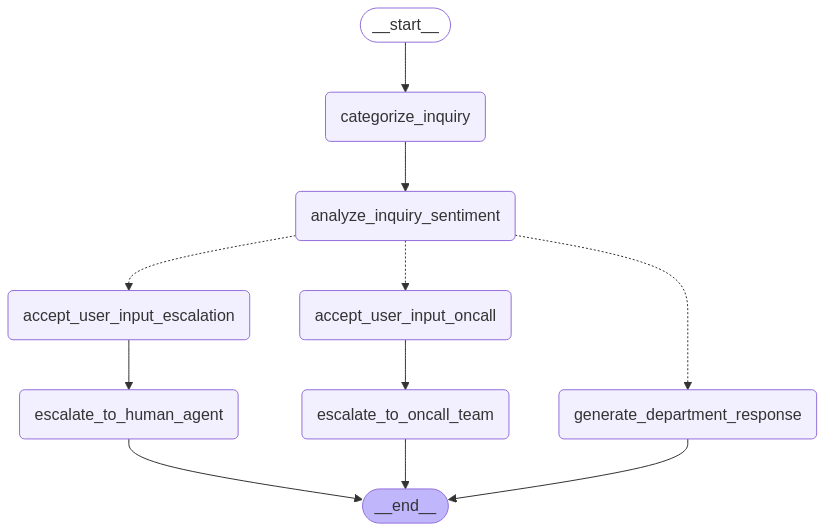

In [ ]:
from IPython.display import display, Image, Markdown

display(Image(compiled_support_agent.get_graph().draw_mermaid_png()))

## Helper Function to Run the Agent

This function takes a customer query and runs it through our compiled agent, returning the final results (category, sentiment, and generated response).

In [ ]:
def call_support_agent(agent, prompt, user_session_id, verbose=False):
    events = agent.stream(
        {"customer_query": prompt}, # initial state of the agent
        {"configurable": {"thread_id": user_session_id}},
        stream_mode="values",
    )

    print('Running Agent. Please wait...')
    for event in events:
        if verbose:
                print(event)


    print('\nFinal Response:')
    display(Markdown(event['final_response']))

## Testing the Customer Support Router RAG Agent

Let's test the workflow with some sample queries to verify categorization, sentiment analysis, and response generation.

In [ ]:
[item['text'] for item in knowledge_base]

["Question: How can I view my healthcare billing statement online? Answer: You can view your billing statement by logging into your patient portal and selecting 'Billing Statements'.",
 'Question: What payment methods are accepted for medical bills? Answer: We accept credit cards, bank transfers, and insurance payments for settling your medical bills.',
 'Question: Can I get a detailed invoice for my medical services? Answer: Yes, a detailed invoice is available in your patient portal under the billing section.',
 'Question: Is there a discount for upfront payment of my medical bill? Answer: Some facilities offer discounts for upfront payments; please contact our billing department for details.',
 'Question: How do I update my billing information on my healthcare account? Answer: You can update your billing details through your online patient portal in the account settings.',
 'Question: Are there any additional fees for medical billing services? Answer: All fees are clearly outlined i

In [ ]:
uid = 'jim001'
query = "I am unable to breathe properly, need help"
call_support_agent(agent=compiled_support_agent,
                   prompt=query,
                   user_session_id=uid,
                   verbose=True)

Running Agent. Please wait...
{'customer_query': 'I am unable to breathe properly, need help'}
{'customer_query': 'I am unable to breathe properly, need help', 'query_category': 'Appointments'}
{'customer_query': 'I am unable to breathe properly, need help', 'query_category': 'Appointments', 'query_sentiment': 'Distress'}


.....................................................{'customer_query': 'I am unable to breathe properly, need help', 'query_category': 'Appointments', 'query_sentiment': 'Distress', 'oncall_cust_info': {'name': 'Jim', 'number': '100019'}}
{'customer_query': 'I am unable to breathe properly, need help', 'query_category': 'Appointments', 'query_sentiment': 'Distress', 'oncall_cust_info': {'name': 'Jim', 'number': '100019'}, 'final_response': "Don't worry Jim!, someone from our on-call expert doctors will be reaching out to your shortly at 100019 for assistance immediately!"}

Final Response:


Don't worry Jim!, someone from our on-call expert doctors will be reaching out to your shortly at 100019 for assistance immediately!

In [ ]:
query = "how do I get my invoice?"
call_support_agent(agent=compiled_support_agent,
                   prompt=query,
                   user_session_id=uid,
                   verbose=False)

Running Agent. Please wait...

Final Response:


Thank you for reaching out with your query about obtaining your invoice. You can easily access your detailed invoice by logging into your patient portal. Once logged in, navigate to the 'Billing' section where you will find your invoice available for viewing and download. If you have any further questions or need assistance, please feel free to reach out.

In [47]:
uid = 'jon007'
query = "how could I update my policy?"
call_support_agent(agent=compiled_support_agent,
                   prompt=query,
                   user_session_id=uid,
                   verbose=True)

Running Agent. Please wait...
{'customer_query': 'how could I update my policy?'}
{'customer_query': 'how could I update my policy?', 'query_category': 'Insurance'}
{'customer_query': 'how could I update my policy?', 'query_category': 'Insurance', 'query_sentiment': 'Neutral'}
{'customer_query': 'how could I update my policy?', 'query_category': 'Insurance', 'query_sentiment': 'Neutral', 'final_response': 'To update your insurance policy, you can do so through the insurance settings in your patient portal. Simply log in to your account, navigate to the insurance section, and make the necessary changes to your policy information. If you encounter any issues or need further assistance, please feel free to reach out to our support team. Additionally, any changes you make will be updated in your patient portal and communicated to you via email notifications.'}

Final Response:


To update your insurance policy, you can do so through the insurance settings in your patient portal. Simply log in to your account, navigate to the insurance section, and make the necessary changes to your policy information. If you encounter any issues or need further assistance, please feel free to reach out to our support team. Additionally, any changes you make will be updated in your patient portal and communicated to you via email notifications.

In [ ]:
query = "Which doctors are available?"
call_support_agent(agent=compiled_support_agent,
                   prompt=query,
                   user_session_id=uid,
                   verbose=False)

Running Agent. Please wait...

Final Response:


Thank you for reaching out with your query about doctor availability. The following doctors are available for appointments five days a week:

- Dr. Smith (Cardiology)
- Dr. Johnson (Dermatology)
- Dr. Lee (Pediatrics)
- Dr. Patel (Orthopedics)
- Dr. Garcia (Neurology)

To find out more about their specific availability or to schedule an appointment, please visit the appointment section in your portal. There, you can filter by specialty and location to find the most convenient option for you. If you have any urgent needs or require a same-day appointment, please contact our scheduling department for assistance.

If you have any further questions or need additional help, feel free to reach out.

In [49]:
query = "I'm fed up with the portal hanging, need help ASAP"
call_support_agent(agent=compiled_support_agent,
                   prompt=query,
                   user_session_id=uid,
                   verbose=True)

Running Agent. Please wait...
{'customer_query': "I'm fed up with the portal hanging, need help ASAP", 'query_category': 'Appointments', 'query_sentiment': 'Neutral', 'final_response': 'Thank you for reaching out with your query about doctor availability. The following doctors are available for appointments five days a week:\n\n- Dr. Smith (Cardiology)\n- Dr. Johnson (Dermatology)\n- Dr. Lee (Pediatrics)\n- Dr. Patel (Orthopedics)\n- Dr. Garcia (Neurology)\n\nTo find out more about their specific availability or to schedule an appointment, please visit the appointment section in your portal. There, you can filter by specialty and location to find the most convenient option for you. If you have any urgent needs or require a same-day appointment, please contact our scheduling department for assistance.\n\nIf you have any further questions or need additional help, feel free to reach out.'}
{'customer_query': "I'm fed up with the portal hanging, need help ASAP", 'query_category': 'Appointm

...................................................................................................................{'customer_query': "I'm fed up with the portal hanging, need help ASAP", 'query_category': 'Appointments', 'query_sentiment': 'Negative', 'escalation_cust_info': {'name': 'Jon', 'number': '1000100', 'email': 'jon@gmail.com'}, 'final_response': 'Thank you for reaching out with your query about doctor availability. The following doctors are available for appointments five days a week:\n\n- Dr. Smith (Cardiology)\n- Dr. Johnson (Dermatology)\n- Dr. Lee (Pediatrics)\n- Dr. Patel (Orthopedics)\n- Dr. Garcia (Neurology)\n\nTo find out more about their specific availability or to schedule an appointment, please visit the appointment section in your portal. There, you can filter by specialty and location to find the most convenient option for you. If you have any urgent needs or require a same-day appointment, please contact our scheduling department for assistance.\n\nIf you have

Apologies, Jon,  we are really sorry! Someone from our team will be reaching out to via email shortly at jon@gmail.com and if needed we will also be calling you at: 1000100 to help you out!